# <u> Machine Learning Internship Project at Bharat Intern - House Price Prediction  (Task 3)</u>

In This Project , we build a machine learing model that predicts the price of house using linear regression Algorithm as well as Utilizing a neural network model, we study the data based on various features to forecast house prices.

## import required libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.linear_model import LinearRegression
import tensorflow as tf
sns.set_style('ticks')

## loading Data

In [26]:
data=pd.read_csv('Housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [27]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# <u> <i> PreProcessing :- </i> </u>

## Checking Missing Values

In [28]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<i>Nice , There is no missing values</i>

## Checking duplicte Values

In [29]:
data.duplicated().sum()

0

<i>Nice, there is no duplicte values </i>

## Get Statistical infromation about our Dataset

In [30]:
data.describe(include='number')

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [31]:
data.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


#  <u> <i> Visulaization and Analysis :- </i> </u>

## identify numerical columns and catgorial columns

In [32]:
numerical_cols=data.select_dtypes(include=['Int64']).columns
catgorical_cols=data.select_dtypes(include=[object]).columns

## Distributions of numerical columns

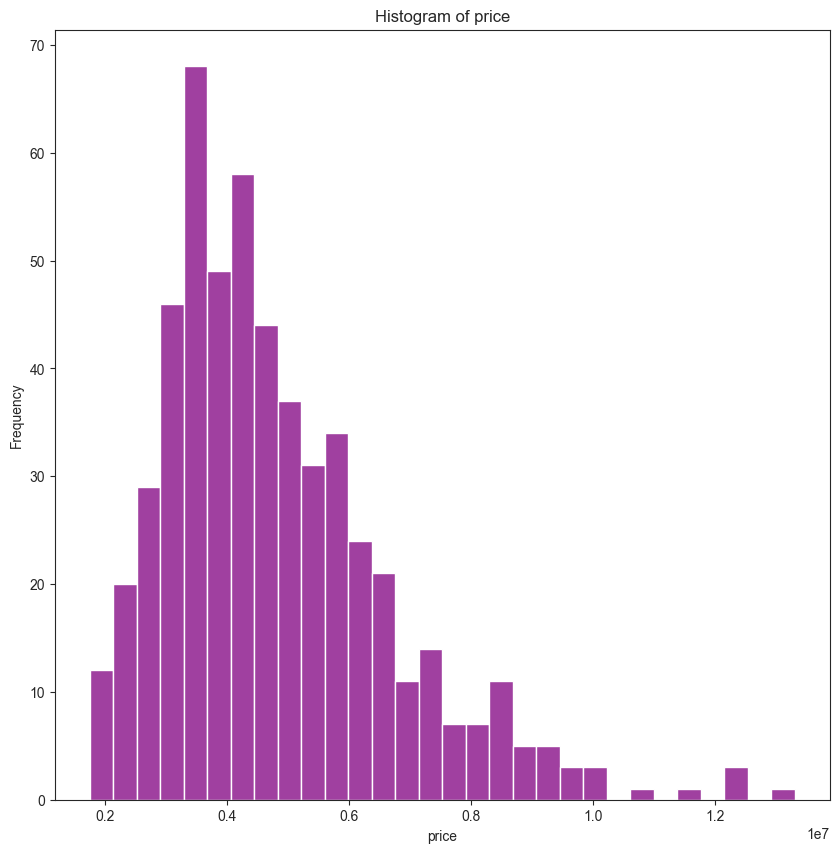

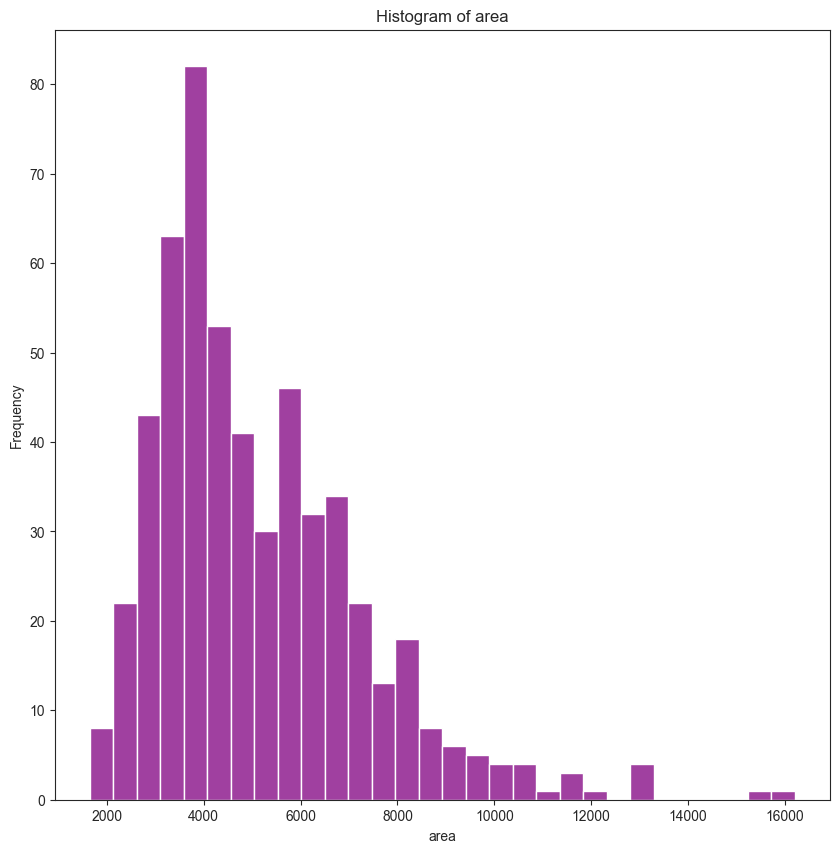

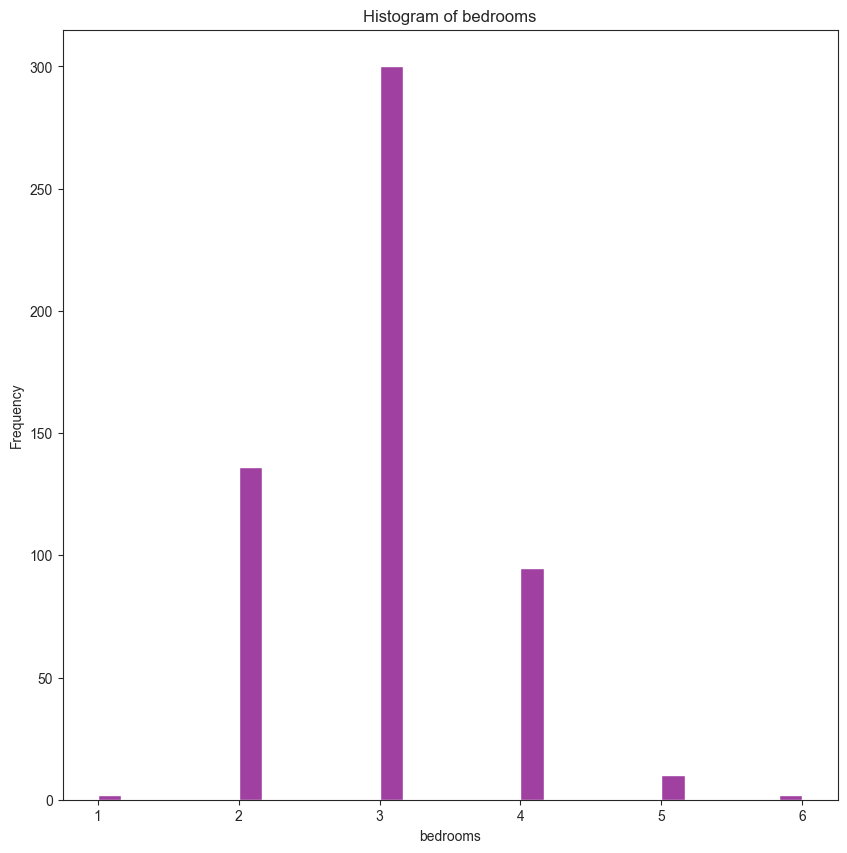

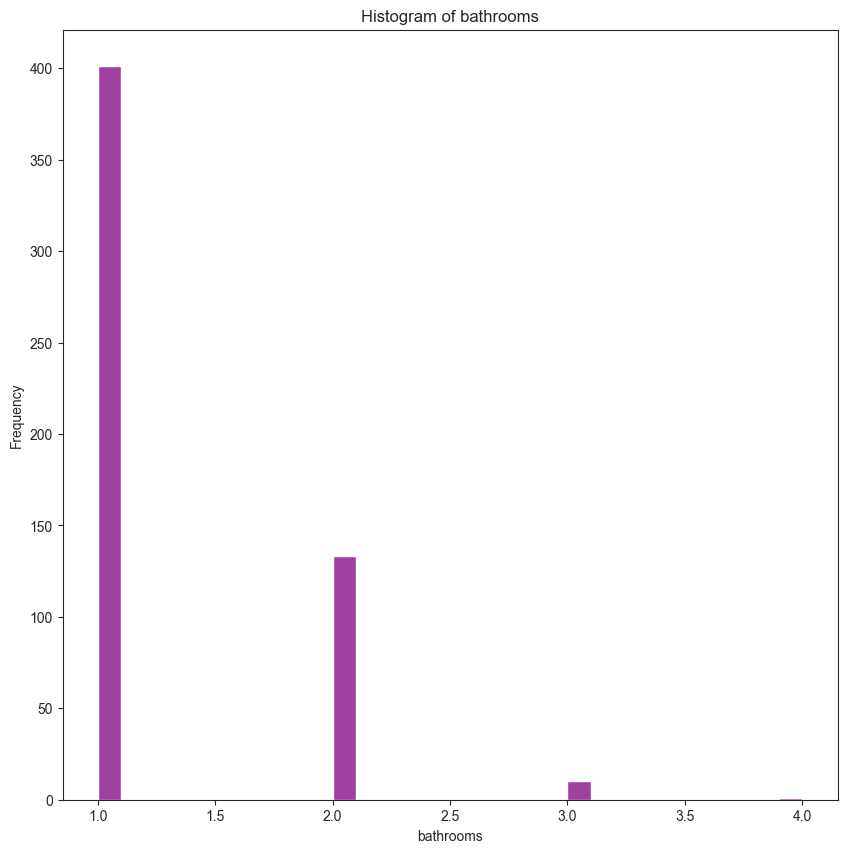

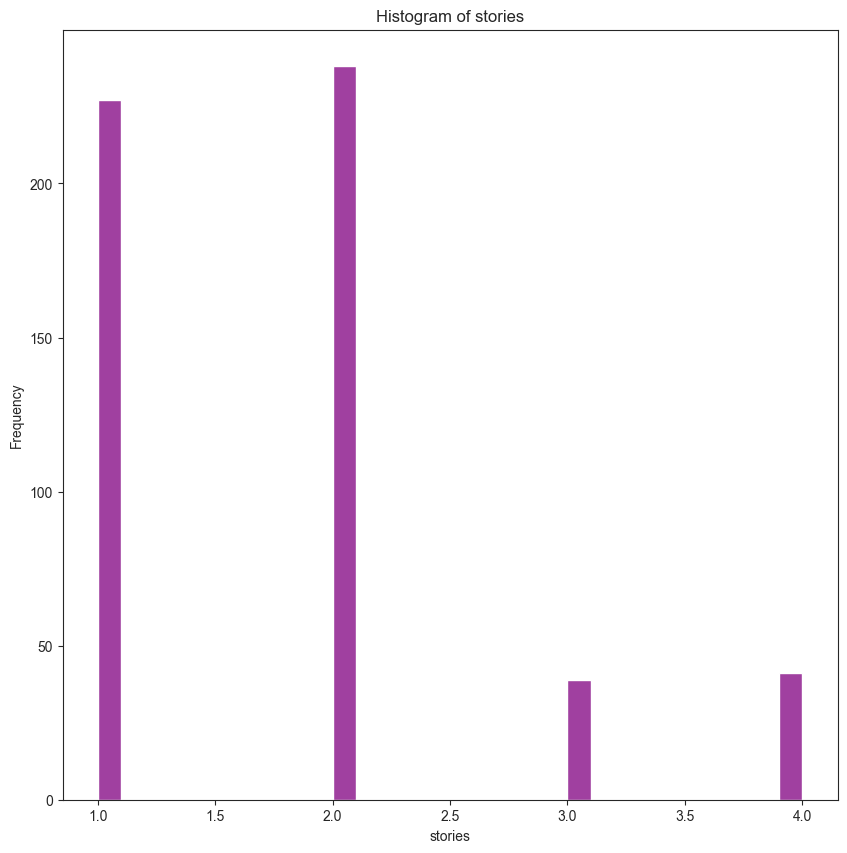

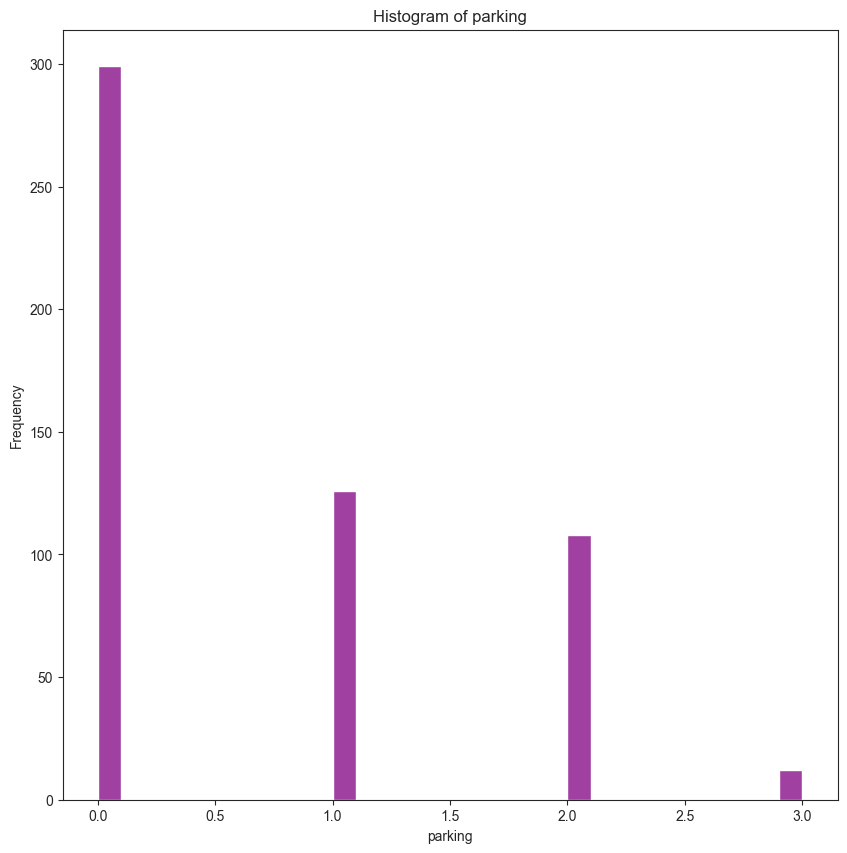

In [33]:
for col in numerical_cols :
  plt.figure(figsize=(10,10))
  sns.histplot(data[col],bins=30,color='purple')
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

C:\Users\engyo\AppData\Local\Temp\ipykernel_3676\2104104502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis')


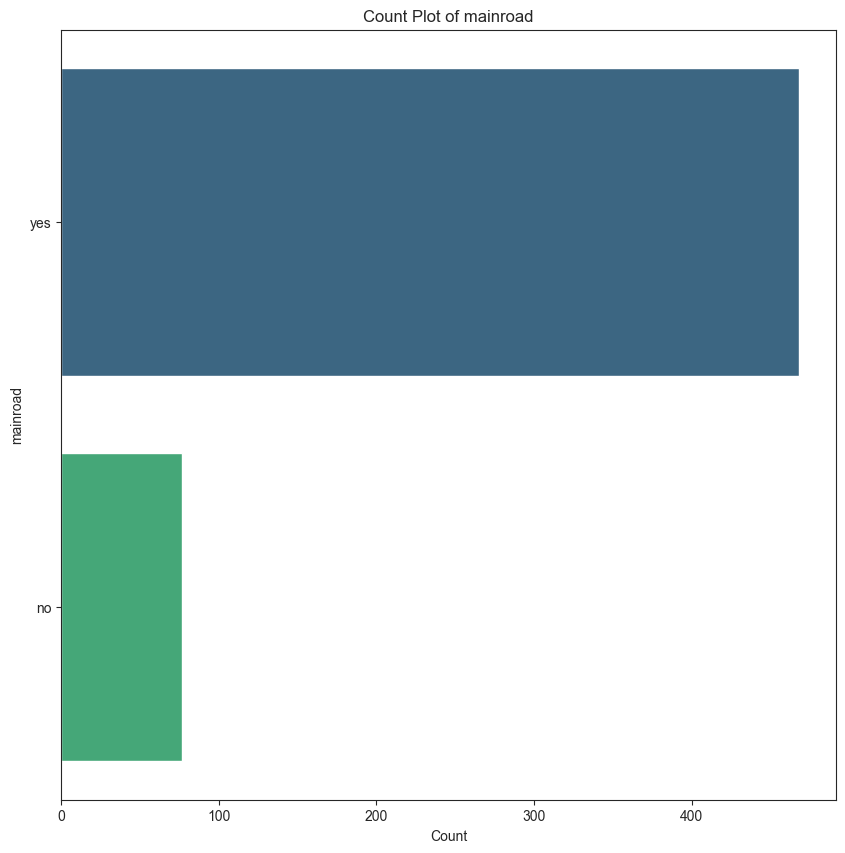

C:\Users\engyo\AppData\Local\Temp\ipykernel_3676\2104104502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis')


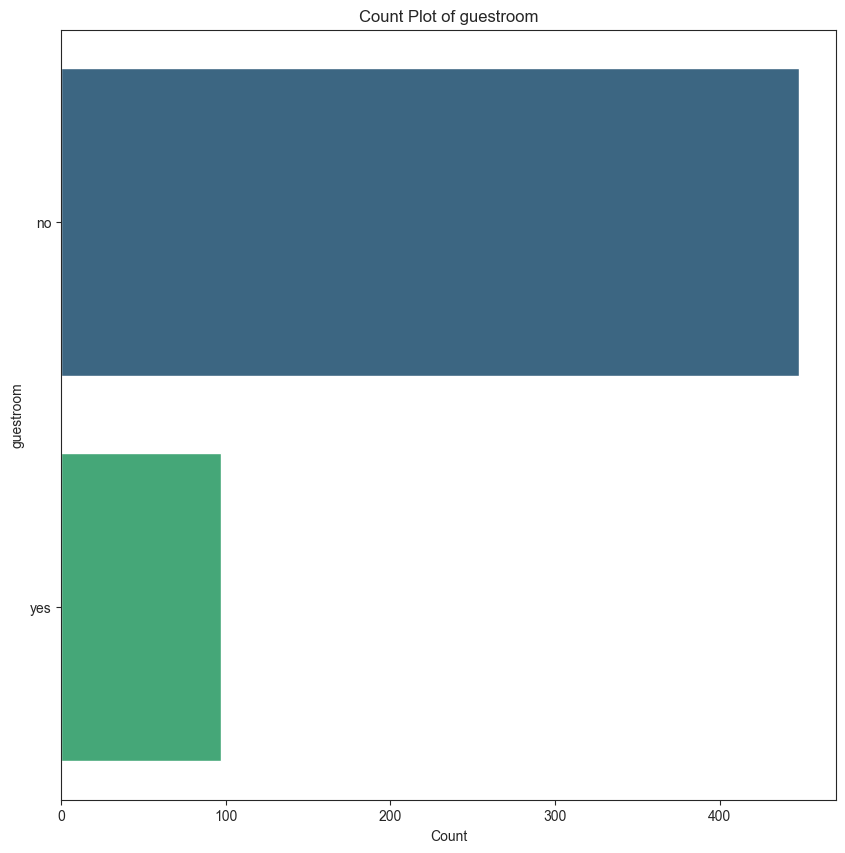

C:\Users\engyo\AppData\Local\Temp\ipykernel_3676\2104104502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis')


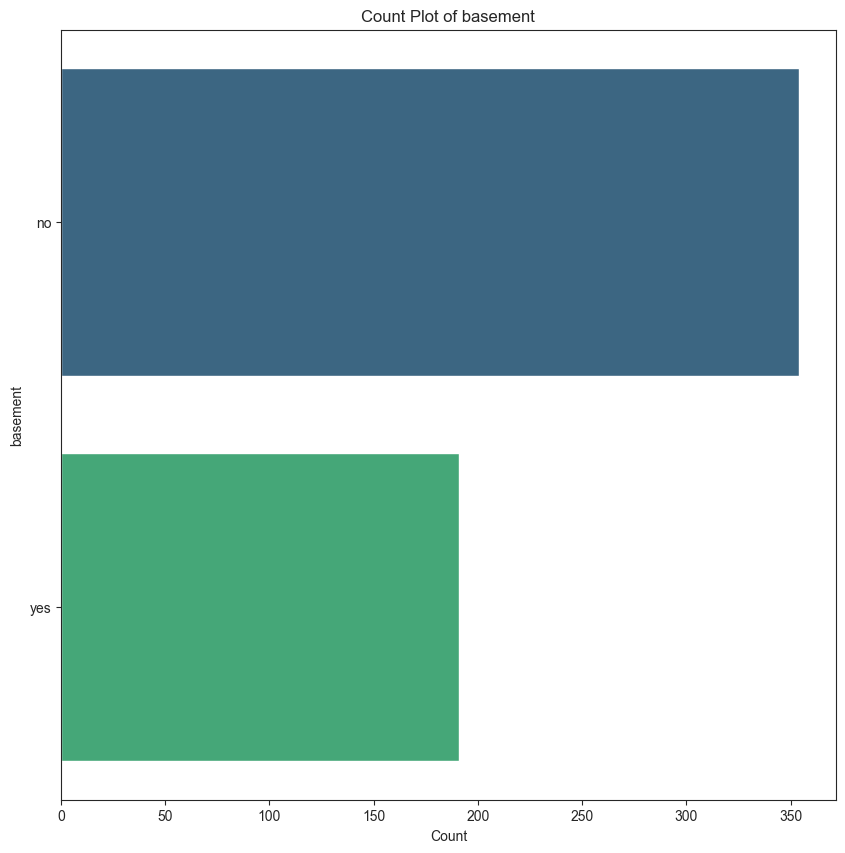

C:\Users\engyo\AppData\Local\Temp\ipykernel_3676\2104104502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis')


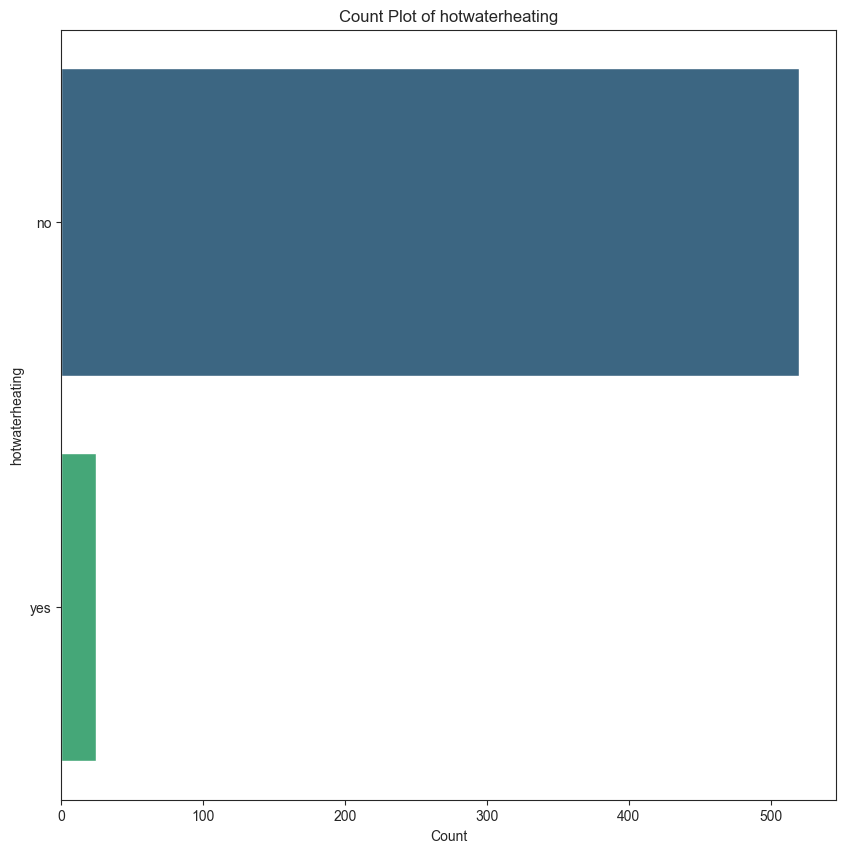

C:\Users\engyo\AppData\Local\Temp\ipykernel_3676\2104104502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis')


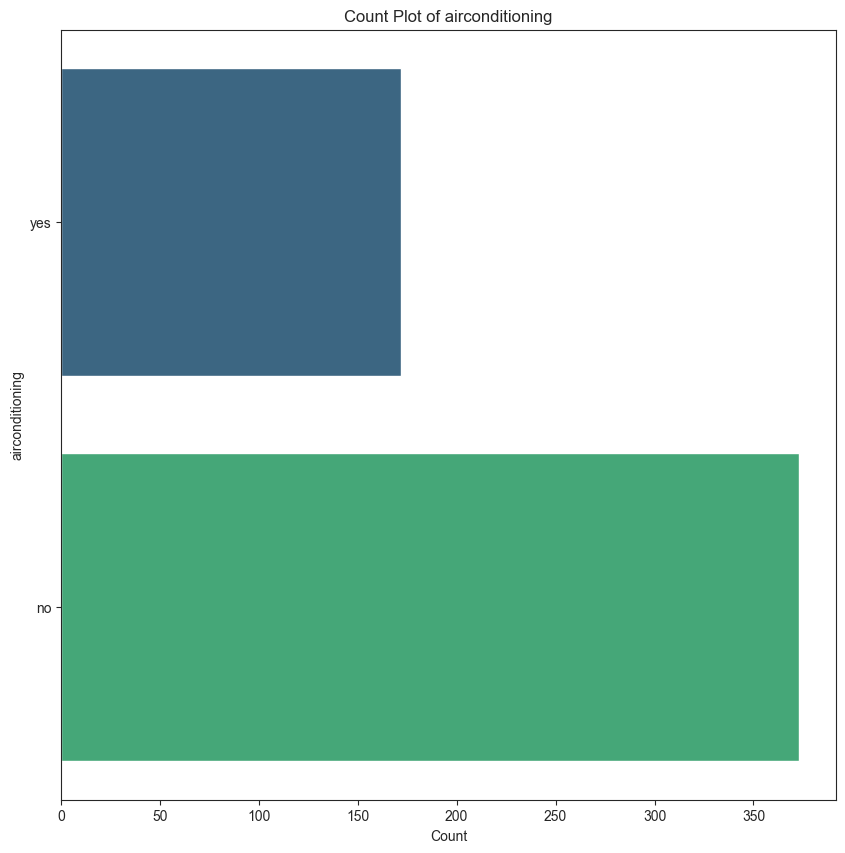

C:\Users\engyo\AppData\Local\Temp\ipykernel_3676\2104104502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis')


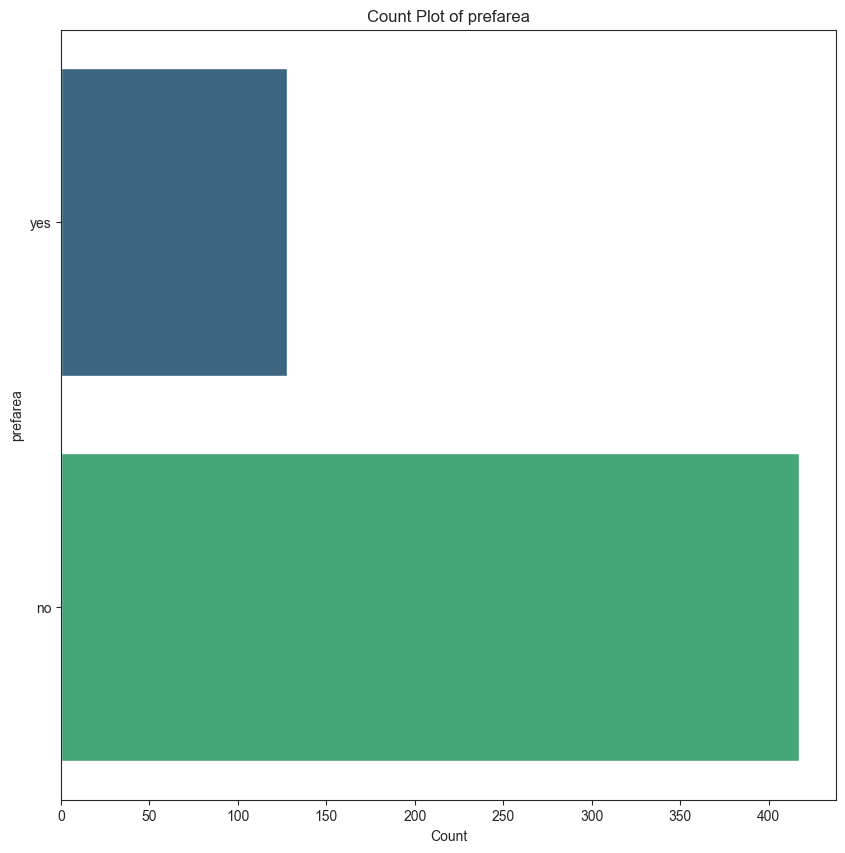

C:\Users\engyo\AppData\Local\Temp\ipykernel_3676\2104104502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis')


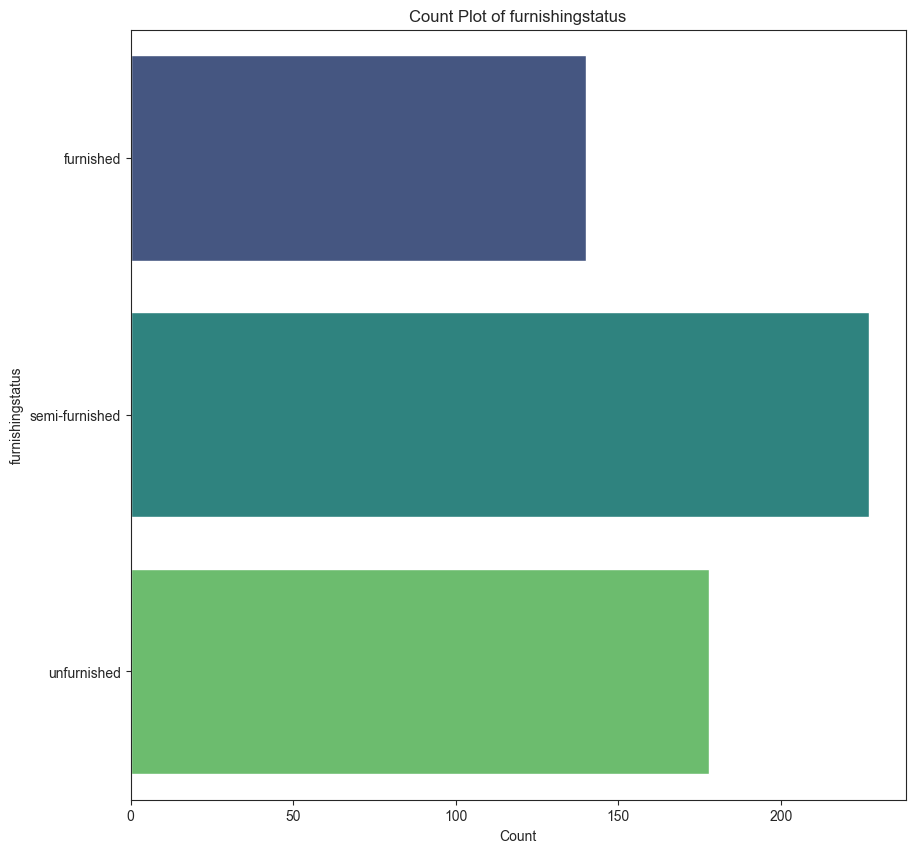

In [34]:
for col in catgorical_cols:
    plt.figure(figsize=(10, 10))
    sns.countplot(y=data[col], palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

## Correlation between numerical features

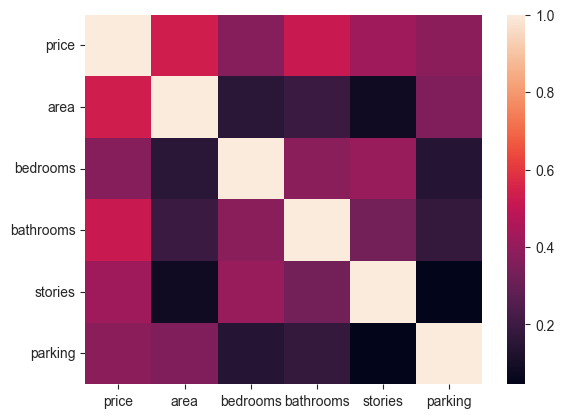

In [35]:
corr_matrix=data[numerical_cols].corr()
sns.heatmap(corr_matrix)
plt.show()

## Selecting relevant columns to the target

In [36]:
cdf=['area','bathrooms','bedrooms','stories','parking','price']
cdf=data[cdf]
cdf.head()

,area,bathrooms,bedrooms,stories,parking,price
0,7420,2,4,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,2,3,2,2,12250000
3,7500,2,4,2,3,12215000
4,7420,1,4,2,2,11410000


## Performing Scaling 

In [37]:
scaler = MinMaxScaler()
cdf= pd.DataFrame(scaler.fit_transform(cdf), columns=cdf.columns)

## determine the features and target column

In [38]:
x=cdf.drop(columns='price',axis=1)
y=cdf['price']

## split data into train and test

In [39]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3,random_state=42)

## <u><i> Applying Linear Regression Algorithm :- </i></u>

### Train our Model 

In [40]:
model=LinearRegression ()
model.fit(train_x,train_y)

LinearRegression()

### Testig our Model 

In [41]:
y_pred=model.predict(test_x)

## Evaluate our Model

In [42]:
MSE=mean_squared_error(y_pred,test_y)
print('Mean Square Error = ',MSE)

print(50*'*')

MAE=mean_absolute_error(y_pred,test_y)
print('Mean Absolute Error = ',MAE)

print(50*'*')


Mean Square Error =  0.015323289410556678
**************************************************
Mean Absolute Error =  0.09221972522708048
**************************************************


## <u> Artificial Neural Network (ANN) :- </u>

## Building the network using TensorFlow

The model consists of an input layer with 5 units corrseponding to our number of feautures, followed by two dense layers with sigmoid and ReLU activation functions, each containing 4 and 2 units respectively. The output layer has 1 unit with a sigmoid activation function

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),  
])

## Compiling Model

In [44]:
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

We train the NN using our training data for 500 epochs with a batch size of 32 and a validation split of 15% meaning that 15% of the training data will be used for validation of the model. This is stored in the history variable which prints the epochs.

In [45]:
history = model.fit(train_x, train_y, epochs = 500, batch_size = 32, validation_split = 0.15)

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0541 - val_mse: 0.0541
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0506 - mse: 0.0506 - val_loss: 0.0498 - val_mse: 0.0498
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 9/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.02

## Test our Model 

In [46]:
predictions = model.predict(test_x)
predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[0.396892  ],
       [0.41834867],
       [0.13337614],
       [0.21196632],
       [0.14187492],
       [0.21085398],
       [0.33031178],
       [0.33830193],
       [0.13936453],
       [0.11705783],
       [0.5830455 ],
       [0.1312341 ],
       [0.12700343],
       [0.16209581],
       [0.18388599],
       [0.3918709 ],
       [0.12759084],
       [0.2746005 ],
       [0.26993507],
       [0.1784201 ],
       [0.3177465 ],
       [0.21382189],
       [0.12562749],
       [0.2087311 ],
       [0.3524755 ],
       [0.5073867 ],
       [0.11527307],
       [0.26111054],
       [0.4990037 ],
       [0.14855637],
       [0.29234418],
       [0.19005606],
       [0.40483162],
       [0.2597307 ],
       [0.21934983],
       [0.3447807 ],
       [0.26538378],
       [0.1759702 ],
       [0.13190584],
       [0.26916784],
       [0.31348664],
       [0.12526157],
       [0.41621923],
       [0.22016537],
       [0.1981939 ],
       [0.20445634],
       [0.44839403],
       [0.246

## Evaluating Model

In [47]:
evaluation = model.evaluate(test_x, test_y)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0158 - mse: 0.0158 


## plotting Loss Graph

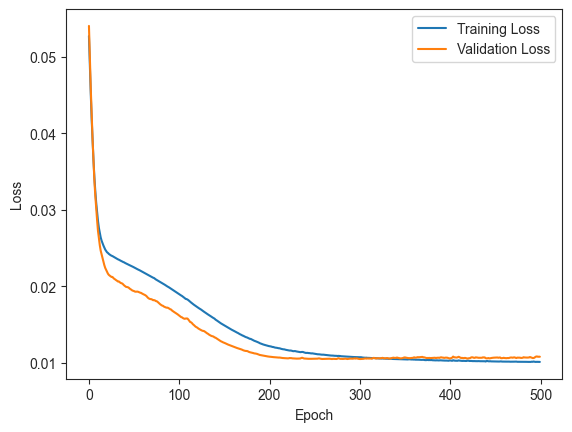

In [48]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()